In [20]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from torchvision import datasets, transforms
from vae import *
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


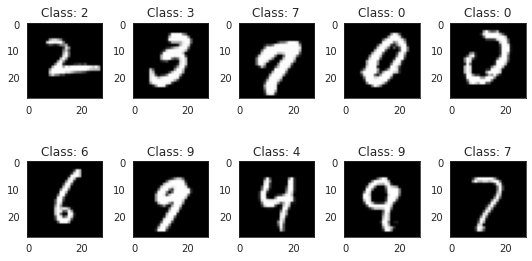

In [21]:
batch_size = 128
dataset = datasets.MNIST 

train_loader = torch.utils.data.DataLoader(
        dataset('data', train=True, download=True, transform=transforms.ToTensor()),
        batch_size=batch_size, shuffle=True,)
test_loader = torch.utils.data.DataLoader(
        dataset('data', train=False, download=True, transform=transforms.ToTensor()),
        batch_size=1000, shuffle=True,)

# Visualize a few random samples from the dataset
utils.visualize_mnist(train_loader)

In [22]:
obs_dim = 784
latent_dim = 32
hidden_dims = [600, 400]  

vae = VAE(obs_dim, latent_dim, hidden_dims)
opt = torch.optim.Adam(vae.parameters(), lr=1e-3)

In [23]:
max_epochs = 10
display_step = 200
for epoch in range(max_epochs):
    print(f'Epoch {epoch}')
    for ix, batch in enumerate(train_loader):
        x, y = batch
        x = x.view(x.shape[0], obs_dim)
        opt.zero_grad()
        loss = -vae.elbo(x).mean(-1)
        loss.backward()
        opt.step()
        
        if ix % display_step == 0:
            print(f'  loss = {loss.item():.2f}')

Epoch 0
  loss = 544.56
  loss = 179.55
  loss = 155.62
Epoch 1
  loss = 143.31
  loss = 126.47
  loss = 119.56
Epoch 2
  loss = 129.77
  loss = 112.56
  loss = 113.68
Epoch 3
  loss = 116.66
  loss = 111.43
  loss = 106.17
Epoch 4
  loss = 115.66
  loss = 111.62
  loss = 110.85
Epoch 5
  loss = 111.58
  loss = 103.32
  loss = 109.53
Epoch 6
  loss = 106.43
  loss = 106.56
  loss = 109.69
Epoch 7
  loss = 107.39
  loss = 110.49
  loss = 104.21
Epoch 8
  loss = 103.11
  loss = 108.26
  loss = 109.82
Epoch 9
  loss = 103.59
  loss = 109.62
  loss = 102.59


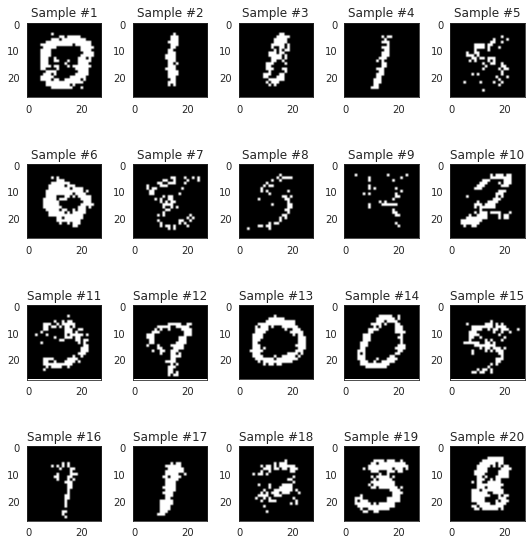

In [24]:
x = vae.sample(20).view(-1, 28, 28).detach().numpy()
utils.visualize_samples(x)